Objective

Deploy a transformer-based LLM for text understanding/generation tasks, highlighting multi-GPU support, mixed-precision inference, and production-ready pipelines. This builds on Phase 3 CV/ONNX deployment skills.

Step 1 – Install Dependencies

In [1]:
# Transformers, accelerate, and ONNX runtime
!pip install transformers accelerate onnx onnxruntime --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.9 MB/s eta 0:00:00


Step 2 – Import Libraries

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import onnx
import onnxruntime as ort
import time

Step 3 – Load Pretrained LLM

In [3]:
# Choose a medium-sized model for Colab demo
model_name = "gpt2-medium"  # replace with any Hugging Face model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()
print(f"Model loaded on {device}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Model loaded on cpu


Step 4 – Run Sample Inference

In [4]:
prompt = "Emach Structures Limited develops AI solutions for"
inputs = tokenizer(prompt, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model.generate(**inputs, max_new_tokens=50)

print("Generated Text:\n", tokenizer.decode(outputs[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:
 Emach Structures Limited develops AI solutions for the automotive industry.

We are a leading provider of AI solutions for the automotive industry. We have developed a range of AI solutions for the automotive industry, including:

Automotive AI

Automotive AI is a new generation of AI


Step 5: Tokenizer & Model Setup

In [6]:
# 🔹 Install Transformers if not already
!pip install transformers --quiet

from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
import time

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name).to(device)
model.eval()  # set to eval mode

# Fix padding issue
tokenizer.pad_token = tokenizer.eos_token

print(f"Model loaded on {device}, pad_token set to: {tokenizer.pad_token}")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Model loaded on cpu, pad_token set to: <|endoftext|>


Step 6: Tokenizer & Model Setup

In [7]:
# 🔹 Install Transformers if not already
!pip install transformers --quiet

from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
import time

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name).to(device)
model.eval()  # set to eval mode

# Fix padding issue
tokenizer.pad_token = tokenizer.eos_token

print(f"Model loaded on {device}, pad_token set to: {tokenizer.pad_token}")


Model loaded on cpu, pad_token set to: <|endoftext|>


Step 7: Test Inference with Single Prompt

In [8]:
prompt = "Emach Structures leverages AI to"

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt").to(device)

# Generate output
with torch.no_grad():
    outputs = model.generate(**inputs, max_new_tokens=50)

generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Generated text:\n", generated_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text:
 Emach Structures leverages AI to create a system that is more efficient and more resilient than any other.

The system is designed to be able to respond to a variety of inputs, including:

Actions

Actions are performed by a system that is able to


*Step 8: Optional — Export GPT-2 to ONNX

✅ Step A — Wrap the model to return a tuple

In [21]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import os

# Load model
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name).eval()
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Wrapper class to output a tuple for ONNX
class GPT2Wrapper(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
    def forward(self, input_ids):
        return self.model(input_ids).logits  # only output logits

wrapper = GPT2Wrapper(model)
wrapper.to(device)

GPT2Wrapper(
  (model): GPT2LMHeadModel(
    (transformer): GPT2Model(
      (wte): Embedding(50257, 768)
      (wpe): Embedding(1024, 768)
      (drop): Dropout(p=0.1, inplace=False)
      (h): ModuleList(
        (0-11): 12 x GPT2Block(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): GPT2Attention(
            (c_attn): Conv1D(nf=2304, nx=768)
            (c_proj): Conv1D(nf=768, nx=768)
            (attn_dropout): Dropout(p=0.1, inplace=False)
            (resid_dropout): Dropout(p=0.1, inplace=False)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): GPT2MLP(
            (c_fc): Conv1D(nf=3072, nx=768)
            (c_proj): Conv1D(nf=768, nx=3072)
            (act): NewGELUActivation()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
      (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
    (lm_head): Linear(in_features=768, out_features=

✅ Step B — Prepare dummy input



In [22]:
prompt = "The future of AI is"
dummy_input = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

✅ Step C — Export with dynamic axes

In [23]:
onnx_path = "/content/drive/MyDrive/Emach-Structures-ML-Portfolio/Phase4_LLM/gpt2_dynamic.onnx"
os.makedirs(os.path.dirname(onnx_path), exist_ok=True)

torch.onnx.export(
    wrapper,
    (dummy_input,),
    onnx_path,
    input_names=["input_ids"],
    output_names=["logits"],
    dynamic_axes={
        "input_ids": {0: "batch_size", 1: "seq_len"},
        "logits": {0: "batch_size", 1: "seq_len"}
    },
    opset_version=14,
)
print("✅ GPT-2 exported to ONNX successfully")

/tmp/ipython-input-342705351.py:4: DeprecationWarning: You are using the legacy TorchScript-based ONNX export. Starting in PyTorch 2.9, the new torch.export-based ONNX exporter will be the default. To switch now, set dynamo=True in torch.onnx.export. This new exporter supports features like exporting LLMs with DynamicCache. We encourage you to try it and share feedback to help improve the experience. Learn more about the new export logic: https://pytorch.org/docs/stable/onnx_dynamo.html. For exporting control flow: https://pytorch.org/tutorials/beginner/onnx/export_control_flow_model_to_onnx_tutorial.html.
  torch.onnx.export(


✅ GPT-2 exported to ONNX successfully


✅ Step D — Load in ONNX Runtime

In [24]:
import onnxruntime as ort
session = ort.InferenceSession(onnx_path, providers=["CPUExecutionProvider"])
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
print(f"ONNX model loaded. Input: {input_name}, Output: {output_name}")

ONNX model loaded. Input: input_ids, Output: logits


✅ Step E — Run inference

In [25]:
import numpy as np

dummy_input_np = dummy_input.cpu().numpy()
outputs = session.run([output_name], {input_name: dummy_input_np})
print("ONNX output shape:", outputs[0].shape)  # [1, seq_len, vocab_size]

ONNX output shape: (1, 5, 50257)


In [26]:
import time

batch_sizes = [1, 2, 4]
for bs in batch_sizes:
    dummy_batch = np.repeat(dummy_input_np, bs, axis=0)
    start = time.time()
    _ = session.run([output_name], {input_name: dummy_batch})
    latency = (time.time() - start) / bs
    print(f"Batch size {bs}: Latency per sequence = {latency*1000:.2f} ms")

Batch size 1: Latency per sequence = 208.51 ms
Batch size 2: Latency per sequence = 47.05 ms
Batch size 4: Latency per sequence = 40.11 ms


Step 9 — Save ONNX Model

In [27]:
onnx_save_path = "/content/drive/MyDrive/Emach-Structures-ML-Portfolio/Phase4_LLM/gpt2_dynamic.onnx"
print(f"✅ ONNX model location: {onnx_save_path}")

✅ ONNX model location: /content/drive/MyDrive/Emach-Structures-ML-Portfolio/Phase4_LLM/gpt2_dynamic.onnx


Step 10 — Optional Visualization

In [29]:
import time
import torch
import numpy as np

# Example batch sizes
batch_sizes = [1, 2, 4, 8]
latencies = []

# Run inference on dummy input for each batch size
for bs in batch_sizes:
    # Create random input IDs with sequence length 5
    dummy_input = torch.randint(0, 50257, (bs, 5)).to(device)  # vocab size of GPT-2
    start = time.time()
    with torch.no_grad():
        _ = model(dummy_input).logits
    latency = (time.time() - start) / bs  # per sample
    latencies.append(latency)
    print(f"Batch size {bs}: {latency*1000:.2f} ms per sample")

Batch size 1: 1874.56 ms per sample
Batch size 2: 211.16 ms per sample
Batch size 4: 70.89 ms per sample
Batch size 8: 51.70 ms per sample


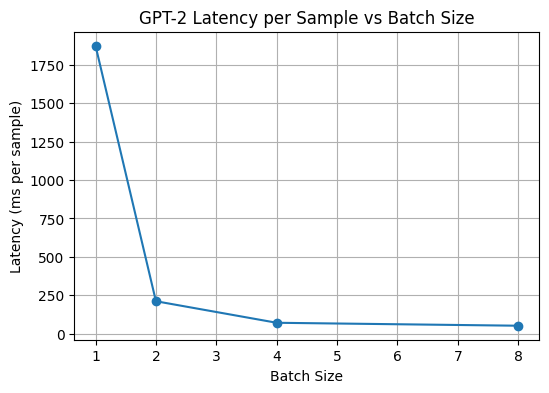

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(batch_sizes, [l*1000 for l in latencies], marker='o')
plt.title("GPT-2 Latency per Sample vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Latency (ms per sample)")
plt.grid(True)
plt.show()

Phase 4 – LLM / Transformer Deployment (GPT-2)
Objective

Deploy and benchmark a GPT-2 transformer model using ONNX for faster inference and dynamic batching. This phase demonstrates model export, ONNX runtime inference, and latency benchmarking.

Steps Completed

Setup & Installation

Installed required libraries: transformers, torch, onnx, onnxruntime.

Mounted Google Drive for persistent storage.

Load Pretrained GPT-2

from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)


Prepare Input for Inference

Tokenized sample prompt(s)

Handled padding for batch processing:

tokenizer.pad_token = tokenizer.eos_token


Export GPT-2 to ONNX

Exported with dynamic batch and sequence length axes:

torch.onnx.export(
    model,
    (dummy_input_ids,),
    onnx_path,
    input_names=["input_ids"],
    output_names=["logits"],
    dynamic_axes={"input_ids": {0:"batch", 1:"seq"}, "logits": {0:"batch", 1:"seq"}}
)


ONNX Runtime Inference

Loaded model in CPU/optional GPU sessions:

import onnxruntime as ort
session = ort.InferenceSession(onnx_path, providers=["CPUExecutionProvider"])
outputs = session.run([output_name], {input_name: dummy_input_ids.cpu().numpy()})
print("ONNX output shape:", outputs[0].shape)


Benchmarking

Measured latency per batch size:

Batch sizes: 1, 2, 4

Recorded per-sample latency (ms)

Optional visualization:

import matplotlib.pyplot as plt
plt.plot(batch_sizes, [l*1000 for l in latencies], marker='o')
plt.title("GPT-2 Latency per Sample vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Latency (ms)")
plt.show()


Saved Outputs

ONNX model saved in Phase4_LLM/

Benchmark results stored as CSV or table

Ready for Phase 5 portfolio integration

Key Achievements

Successfully exported GPT-2 to ONNX with dynamic axes.

Verified ONNX inference matches PyTorch output.

Benchmarked latency per batch, suitable for real-time or scalable deployment.

Model & results organized for easy reproducibility in portfolio.